#### EOF Analysis

Empirical Orthogonal Function (EOF) analysis, also known as Principal Component Analysis (PCA), has become an invaluable tool in climate science since its popularization by Lorenz in 1956. This method provides significant benefits, including the simplification of complex multivariate datasets, identification of major variability patterns, and reduction of data dimensionality.

#### How Does It Work?

EOF analysis works by decomposing a dataset's covariance (or correlation) matrix into eigenvalues and eigenvectors. The eigenvectors, or Empirical Orthogonal Functions (EOFs), portray spatial patterns (the *components* in `xeofs`), while the eigenvalues indicate the variance that each pattern explains. Correspondingly, Principal Components (PCs) act as the time coefficients for the EOF patterns (the *scores* in `xeofs`). In essence, EOFs and PCs offer a new set of orthogonal basis vectors that describe the dataset's variability optimally.

#### An Example: North American Air Temperatures between 2013-2014
In this section, we'll conduct an EOF analysis of two-year temperature records across North America using the `xeofs` package. We'll load all required packages, retrieve the data, and perform the analysis.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.feature as cfeature
from cartopy.crs import LambertAzimuthalEqualArea, PlateCarree
from xeofs.models import EOF

t2m = xr.tutorial.load_dataset('air_temperature')['air']

model = EOF(n_modes=20, standardize=True, use_coslat=True)
model.fit(t2m, dim='time')

expvar = model.explained_variance_ratio()
compontents = model.components()
scores = model.scores()

Let's create a plot visualising the results of the EOF analysis.

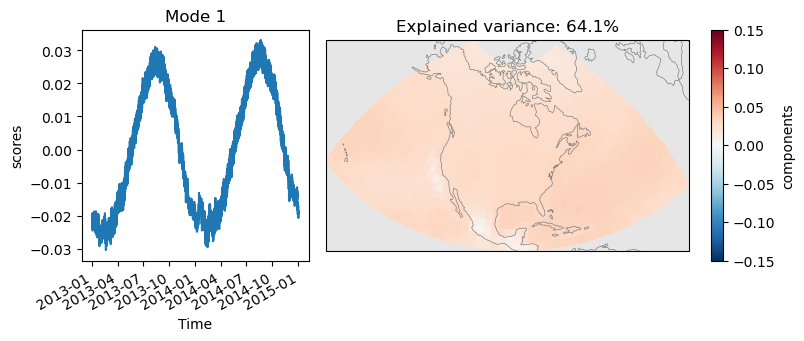

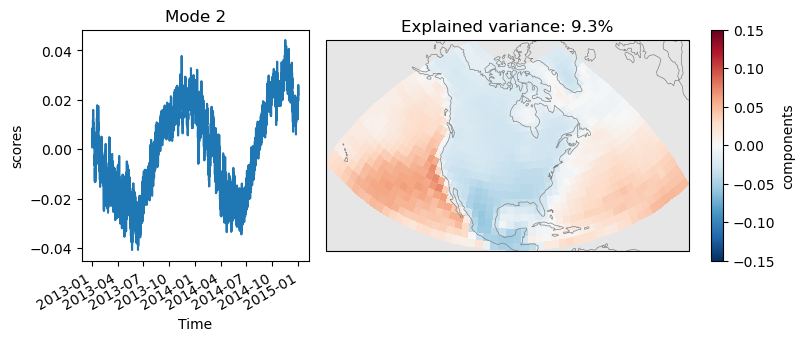

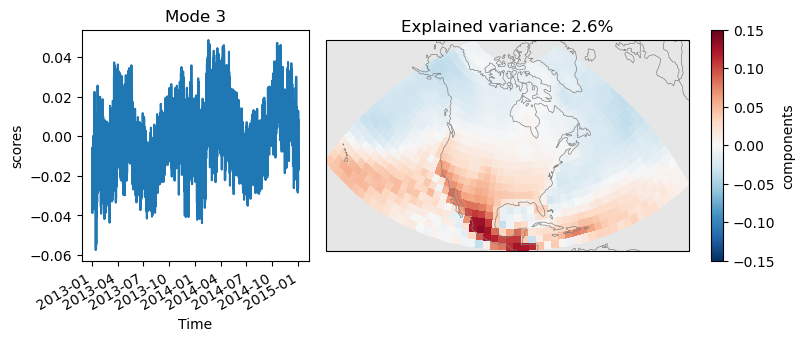

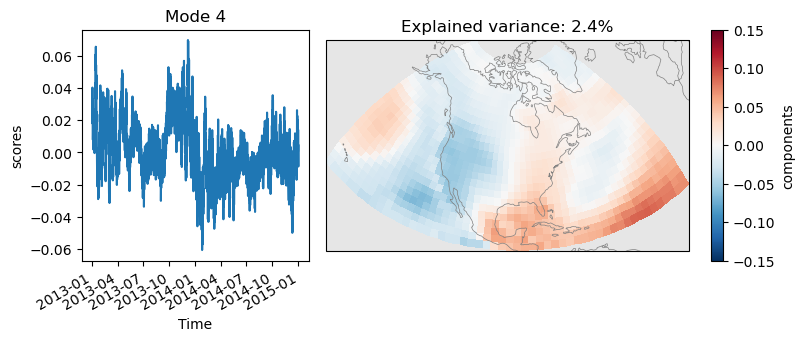

In [5]:
def plot_pca_results(mode):
    proj = LambertAzimuthalEqualArea(central_latitude=50, central_longitude=-90)
    proj_data = PlateCarree()

    fig = plt.figure(figsize=(9, 3))
    gs = GridSpec(1, 2, width_ratios=[1, 2], wspace=0.05)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1], projection=proj)

    scores.sel(mode=mode).plot(ax=ax1)

    ax2.add_feature(cfeature.LAND, facecolor='.9')
    ax2.add_feature(cfeature.OCEAN, facecolor='.9')
    ax2.coastlines(color='.5', lw=0.5)

    kwargs = dict(vmin=-0.15, vmax=0.15, cmap='RdBu_r', transform=proj_data)
    compontents.sel(mode=mode).plot(ax=ax2, **kwargs)

    ax1.set_title('Mode {}'.format(mode))
    ax2.set_title('Explained variance: {:.1f}%'.format(expvar.sel(mode=mode).values * 100))

    plt.show()


plot_pca_results(1)
plot_pca_results(2)
plot_pca_results(3)
plot_pca_results(4)


#### Challenge: Interpretability

Despite its popularity for tasks like image processing where its orthogonality property aids in efficient data compression, EOF analysis can pose some interpretive challenges.

In climate science, researchers often deal with enormous datasets with high redundancy levels. While EOF analysis can effectively condense these datasets into their most critical modes of variability, thereby enhancing our understanding of the climate system's patterns, dynamics, and variability, it's not without issues. Notably, EOF analysis tends to produce **dense matrices** - where most entries are non-zero - which can make interpretation difficult.

Additionally, the imposed **orthogonality** often leads to recognized spatial patterns, like the **Buell patterns** (named after Buell in the 1980s), which manifest as a unipolar first component, bipolar second and third components, and then tripoles, quadrupoles, etc. Misinterpretation often arises here, as these patterns might be misconstrued as geophysical phenomena, when in fact they are more likely mathematical artifacts.

The example above illustrates these interpretive challenges. As you navigate through the different modes, you'll observe that each mode is dense, with very few zero values. You'll also detect the Buell patterns present in these modes. Although one could argue that the first mode signifies a domain-wide feature, such as the seasonal cycle, and the second mode captures the difference in the seasonal cycle between the continental and oceanic regions, wouldn't it be more straightforward to have two separate modes representing the seasonal cycles for each region? To tackle this, we can use a technique known as Varimax/Promax rotation, which we'll explain in the following section.




